In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys, os
# if '_cwd' not in locals():
#     _cwd = os.getcwd()
#     os.chdir(Path(_cwd)/'..')
from pathlib import Path
import numpy as np
from tqdm.notebook import tqdm
import torch
from torch import nn, optim as opt
import torch.nn.functional as F
import torch.distributions as distrib
from torch.utils.data import Dataset, DataLoader, TensorDataset
# %matplotlib notebook
import matplotlib.pyplot as plt

os.environ['OMNIDATA_PATH'] = '/is/ei/fleeb/workspace/local_data'
from omnidata import datasets
from omnilearn import util

No profile path provided (can be set with environment variable: FIG_PROFILE)
2022-07-21 15:59:06.116849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /is/ei/fleeb/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-21 15:59:06.116864: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
device = 'cuda'

In [16]:
dataset = datasets.Shapes3D(download=False, mode='train')
# dataset = MNIST(batch_device=device, batch_size=200)
len(dataset), dataset.din, dataset.dout

(384000,
 Pixels(C=3, H=64, W=64),
 Joint(Periodic(1), Periodic(1), Periodic(1), Bound(min=0.75, max=1.25), Categorical(4), Bound(min=-30, max=30)))

In [18]:
dataset.prepare();
batch = dataset.get_batch()
len(batch)

KeyboardInterrupt: 

In [11]:
X = batch['observation']
X.shape

torch.Size([64, 3, 64, 64])

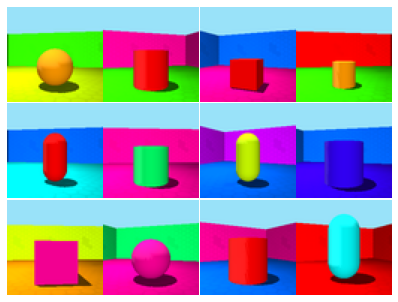

In [20]:
util.plot_imgs(X[:12]);